# Notebook to read raw data
-----

In [29]:
import matplotlib.pyplot as plt
import pytesdaq.io.hdf5 as h5io
from pprint import pprint
from IPython.core.display import HTML

In [30]:
filepath = '/data/raw/livedata/iv_didv_20201212_1522'
filename = 'didv_I2_D20201212_T165308_F0001.hdf5'
fullfile = filepath + '/' + filename

In [31]:
h5 = h5io.H5Reader()

### Connections

In [32]:
connection_table = h5.get_connection_table(file_name = fullfile)
display(HTML(connection_table.to_html()))

,adc_id,adc_channel,detector_channel,tes_channel,controller_id,controller_channel
0,adc1,0,TES800x200,A,feb1,A


### Detector  Settings

In [34]:
settings = h5.get_detector_config(file_name = fullfile)
pprint(settings['TES800x200'])

{'adc_channel_indices': 0,
 'adc_conversion_factor': array([[1.0436792e-04, 3.1236414e-04, 3.9713905e-14, 2.8663868e-18]],
      dtype=float32),
 'adc_name': 'adc1',
 'channel_list': 0,
 'channel_type': 'adc',
 'close_loop_norm': 248000.0,
 'controller_chans': 'feb1_A',
 'dataset_list': [],
 'detector_chans': 'TES800x200',
 'feedback_mode': 'close',
 'feedback_polarity': -1,
 'feedback_resistance': 1240.0,
 'lock_point_voltage': 2.9909647,
 'nb_datasets': 0,
 'open_loop_full_norm': 42000.0,
 'open_loop_preamp_norm': 2000.0,
 'output_gain': 20.0,
 'output_offset': -0.072039075,
 'preamp_gain': 100.0,
 'shunt_resistance': 0.005,
 'signal_gen_current': 0.005,
 'signal_gen_frequency': 30.0,
 'signal_gen_onoff': 'on',
 'signal_gen_phase_shift': 'nan',
 'signal_gen_shape': 'square',
 'signal_gen_source': 'tes',
 'signal_gen_tes_resistance': 1000.0,
 'signal_gen_voltage': 0.005,
 'signal_source': 'feedback',
 'squid_bias': -83.95605,
 'squid_turn_ratio': 10.0,
 'tes_bias': 8.302809,
 'tes_cha

### Get pulses
* Format 1 = List of 2D array[channels, samples]
* Format 2 = 3D array [events, channels, samples]

In [38]:
# Get 10 events (3D array) and metadata, in volts
# use file of path (str or list)
traces,info = h5.read_many_events(filepath=fullfile, detector_chans=['TES800x200'], nevents=10, 
                                  output_format=2, include_metadata=True, adctovolt=True)

(10, 1, 170833)


<IPython.core.display.Javascript object>


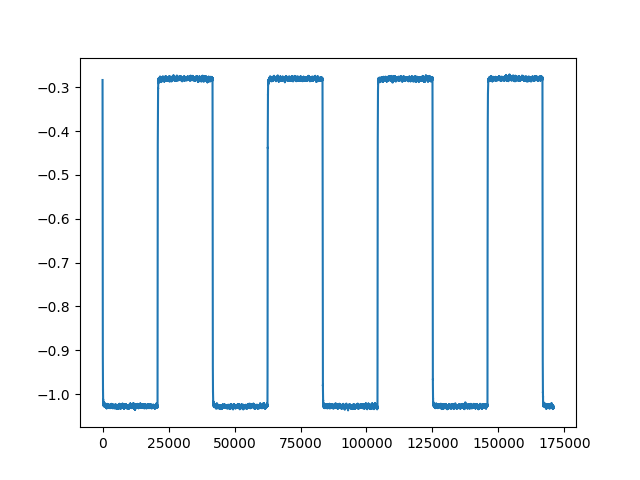

In [46]:
%matplotlib notebook
print(traces.shape)
plt.plot(traces[0,0,:])